# 检查数据集是否下载成功

In [14]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset/AI_Human.csv


# 读入数据

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("./dataset/AI_Human.csv")
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


# **Basic Information**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB
None
Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


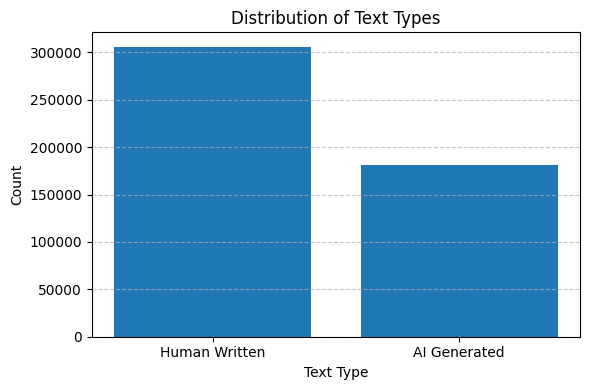

In [16]:
import matplotlib.pyplot as plt

# 基本信息输出
print(df.info())
print("=============================================================================")

# 统计数据
total_texts = df["generated"].count()
human_texts = (df["generated"] == 0.0).sum()
ai_texts = (df["generated"] == 1.0).sum()

print("Total Texts:", total_texts)
print("Human Written Texts:", human_texts)
print("AI Generated Texts:", ai_texts)

# 用 matplotlib 绘制条形图
labels = ['Human Written', 'AI Generated']
counts = [human_texts, ai_texts]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts)
plt.title("Distribution of Text Types")
plt.xlabel("Text Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 数据预处理

In [17]:
# 展示其中一个示例条目
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [18]:
import re

def clean_text_for_classification(text):
    # 转为小写（有助于 CountVectorizer 特征稠密化）
    text = text.lower()

    # 替换换行与多空格（保留语义，但规范格式）
    text = re.sub(r"\s+", " ", text)

    # 去除不可打印字符和 HTML（如果有）
    text = re.sub(r"[^\x00-\x7F]", "", text)
    text = re.sub(r"<.*?>", "", text)

    return text.strip().split()


# 应用改进后的预处理
df["text"] = df["text"].apply(clean_text_for_classification)
df["text"][0]

['cars.',
 'cars',
 'have',
 'been',
 'around',
 'since',
 'they',
 'became',
 'famous',
 'in',
 'the',
 '1900s,',
 'when',
 'henry',
 'ford',
 'created',
 'and',
 'built',
 'the',
 'first',
 'modelt.',
 'cars',
 'have',
 'played',
 'a',
 'major',
 'role',
 'in',
 'our',
 'every',
 'day',
 'lives',
 'since',
 'then.',
 'but',
 'now,',
 'people',
 'are',
 'starting',
 'to',
 'question',
 'if',
 'limiting',
 'car',
 'usage',
 'would',
 'be',
 'a',
 'good',
 'thing.',
 'to',
 'me,',
 'limiting',
 'the',
 'use',
 'of',
 'cars',
 'might',
 'be',
 'a',
 'good',
 'thing',
 'to',
 'do.',
 'in',
 'like',
 'matter',
 'of',
 'this,',
 'article,',
 '"in',
 'german',
 'suburb,',
 'life',
 'goes',
 'on',
 'without',
 'cars,"',
 'by',
 'elizabeth',
 'rosenthal',
 'states,',
 'how',
 'automobiles',
 'are',
 'the',
 'linchpin',
 'of',
 'suburbs,',
 'where',
 'middle',
 'class',
 'families',
 'from',
 'either',
 'shanghai',
 'or',
 'chicago',
 'tend',
 'to',
 'make',
 'their',
 'homes.',
 'experts',
 's

In [20]:
# import numpy as np
# import pandas as pd

# # 句长、词长、标点频率等特征记录
# def extract_text_features(df):
#     df["char_len"] = df["text"].str.len()
#     df["word_count"] = df["text"].str.split().apply(len)
#     df["avg_word_len"] = df["text"].apply(
#         lambda x: np.mean([len(w) for w in x.split()]) if x else 0
#     )
#     df["punct_count"] = df["text"].apply(lambda x: sum(1 for c in x if c in ".,!?"))
#     return df

# df = extract_text_features(df)

# print(df.head())

In [ ]:
# print(df.tail(20))

                                                     text  generated  char_len
487215  [cars, were, mint, to, by, many, things,, comf...        0.0       244
487216  [did, you, know, that, many, schools, offer, a...        0.0       628
487217  [as, an, eighth, grade, student,, i, believe, ...        1.0       420
487218  [driverless, car, wouldn't, be, substantial, t...        0.0       366
487219  [imagine, you're, being, asked, to, do, a, tas...        0.0       488
487220  [do, you, believe, that, the, face, on, mars, ...        0.0       323
487221  [in, vauban,, germany,, there, are, no, cars.,...        0.0       325
487222  [it, is, a, common, belief, that, having, a, b...        1.0       326
487223  [the, natural, landform, on, mars, which, is, ...        0.0       471
487224  [in, "the, challenge, of, exploring, venus,", ...        0.0       437
487225  [there, are, several, reasons, for, which, i, ...        0.0       528
487226  [everybody, has, it., it, goes, with, you, w

# 训练集和测试集划分

In [22]:
import nltk
from nltk.corpus import stopwords

X = df['text']
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
X = X.apply(lambda x : ' '.join([word for word in x if word not in stop_words]))
# X = X.apply(lambda x : ' '.join([word for word in x]))
print(X[0])
y = df['generated']

cars. cars around since became famous 1900s, henry ford created built first modelt. cars played major role every day lives since then. now, people starting question limiting car usage would good thing. me, limiting use cars might good thing do. like matter this, article, "in german suburb, life goes without cars," elizabeth rosenthal states, automobiles linchpin suburbs, middle class families either shanghai chicago tend make homes. experts say huge impediment current efforts reduce greenhouse gas emissions tailpipe. passenger cars responsible 12 percent greenhouse gas emissions europe...and 50 percent carintensive areas united states. cars main reason greenhouse gas emissions lot people driving around time getting need go. article, "paris bans driving due smog," robert duffer says, paris, days nearrecord pollution, enforced partial driving ban clear air global city. also says, monday, motorist evennumbered license plates ordered leave cars home fined 22euro fine 31. order would applie

In [23]:
# y = df['generated']
# X = df['text']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [25]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

438511 438511
48724 48724


# 训练流水线

In [26]:
from sklearn.model_selection import train_test_split

# 从原始训练集中划出验证集（例如 10%）
X_train_small, X_val, y_train_small, y_val = train_test_split(
    X_train, y_train, test_size=0.1, stratify=y_train, random_state=42
)

In [27]:
# fit_train
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier

pipeline = Pipeline(
    [
        ("count_vectorizer", CountVectorizer()),
        ("tfidf_transformer", TfidfTransformer()),
        ("sgd_classifier", SGDClassifier(loss="log_loss", random_state=42)),
    ]
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('sgd_classifier',
                 SGDClassifier(loss='log_loss', random_state=42))])

In [28]:
# partial_train
import copy
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import numpy as np

# 向量化器
vectorizer = CountVectorizer()
tfidf = TfidfTransformer()

# 拟合向量器
X_vec = vectorizer.fit_transform(X_train_small)
X_tfidf = tfidf.fit_transform(X_vec)

# 验证集转换
X_val_vec = vectorizer.transform(X_val)
X_val_tfidf = tfidf.transform(X_val_vec)

# 初始化模型
clf = SGDClassifier(loss="log_loss", warm_start=True)

# 训练参数
n_epochs = 10
batch_size = 1024
n_batches = int(np.ceil(X_tfidf.shape[0] / batch_size))

# 最佳模型追踪
best_acc = 0
best_model = None

for epoch in range(n_epochs):
    print(f"\nEpoch {epoch+1}/{n_epochs}")
    indices = np.random.permutation(X_tfidf.shape[0])
    correct = 0
    total = 0

    for i in tqdm(range(n_batches), desc="Training"):
        start = i * batch_size
        end = min(start + batch_size, X_tfidf.shape[0])
        batch_idx = indices[start:end]

        X_batch = X_tfidf[batch_idx]
        y_batch = y_train_small.iloc[batch_idx]

        clf.partial_fit(X_batch, y_batch, classes=np.array([0, 1]))
        y_pred = clf.predict(X_batch)

        correct += (y_pred == y_batch).sum()
        total += len(y_batch)

    train_acc = correct / total
    print(f"Train Accuracy: {train_acc:.4f}")

    # === 验证集评估 ===
    y_val_pred = clf.predict(X_val_tfidf)
    val_acc = accuracy_score(y_val, y_val_pred)
    print(f"Val   Accuracy: {val_acc:.4f}")

    # === 保存最佳模型 ===
    if val_acc > best_acc:
        best_acc = val_acc
        best_model = copy.deepcopy(clf)
        print("✅ New best model saved!")


Epoch 1/10


Training: 100%|██████████| 386/386 [00:01<00:00, 287.12it/s]


Train Accuracy: 0.9813
Val   Accuracy: 0.9797
✅ New best model saved!

Epoch 2/10


Training: 100%|██████████| 386/386 [00:01<00:00, 281.91it/s]


Train Accuracy: 0.9801
Val   Accuracy: 0.9793

Epoch 3/10


Training: 100%|██████████| 386/386 [00:01<00:00, 270.54it/s]


Train Accuracy: 0.9801
Val   Accuracy: 0.9794

Epoch 4/10


Training: 100%|██████████| 386/386 [00:01<00:00, 305.25it/s]


Train Accuracy: 0.9800
Val   Accuracy: 0.9794

Epoch 5/10


Training: 100%|██████████| 386/386 [00:01<00:00, 298.68it/s]


Train Accuracy: 0.9801
Val   Accuracy: 0.9795

Epoch 6/10


Training: 100%|██████████| 386/386 [00:01<00:00, 314.81it/s]


Train Accuracy: 0.9800
Val   Accuracy: 0.9796

Epoch 7/10


Training: 100%|██████████| 386/386 [00:01<00:00, 278.27it/s]


Train Accuracy: 0.9800
Val   Accuracy: 0.9796

Epoch 8/10


Training: 100%|██████████| 386/386 [00:01<00:00, 266.07it/s]


Train Accuracy: 0.9800
Val   Accuracy: 0.9796

Epoch 9/10


Training: 100%|██████████| 386/386 [00:01<00:00, 268.83it/s]


Train Accuracy: 0.9800
Val   Accuracy: 0.9796

Epoch 10/10


Training: 100%|██████████| 386/386 [00:01<00:00, 267.02it/s]

Train Accuracy: 0.9800
Val   Accuracy: 0.9797


# 结果评估



✅ fit_train Final Test Accuracy: 0.9794
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     30496
         1.0       0.99      0.96      0.97     18228

    accuracy                           0.98     48724
   macro avg       0.98      0.97      0.98     48724
weighted avg       0.98      0.98      0.98     48724



<Figure size 800x600 with 0 Axes>

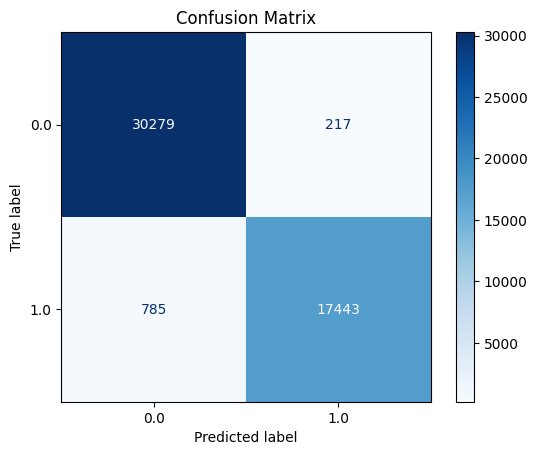

In [29]:
from sklearn.metrics import accuracy_score

# fit_train
y_pred = pipeline.predict(X_test)

# 准确率
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ fit_train Final Test Accuracy: {acc:.4f}")

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()


✅ partial_train Final Test Accuracy: 0.9796
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     30496
         1.0       0.99      0.96      0.97     18228

    accuracy                           0.98     48724
   macro avg       0.98      0.98      0.98     48724
weighted avg       0.98      0.98      0.98     48724



<Figure size 800x600 with 0 Axes>

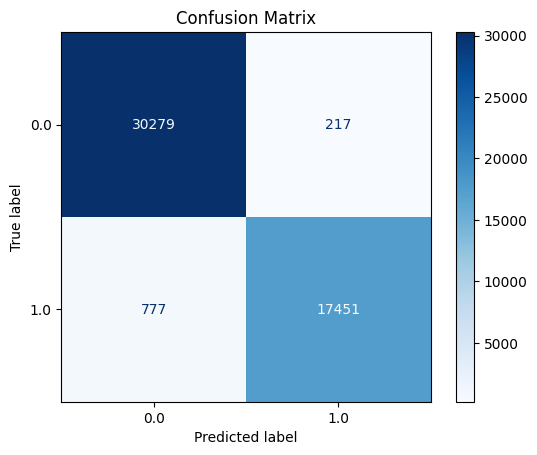

In [30]:
from sklearn.metrics import accuracy_score

# partial_train
X_test_vec = vectorizer.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_vec)

# 预测
y_pred = clf.predict(X_test_tfidf)

# 准确率
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ partial_train Final Test Accuracy: {acc:.4f}")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()